# DS-SF-25 | Codealong 06 | Introduction to Regression and Model Fit

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06.csv'), index_col = 'ID')

df = read_dataset()

In [ ]:
# TODO

## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

> #### Activity | How to scale SalePrice from \$ to \$M, Size and LotSize from sqft to "1,000 sqft"?

In [3]:
def scale_variables(df):
    # TODO: Sale price in $M
    # TODO: Size in 1,000 sqft
    # TODO: Lot size in 1,000 sqft

scale_variables(df)

In [4]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


### `SalePrice` as a function of `Size`

In [5]:
def Xy(df):
    # TODO

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 01 Aug 2016   Prob (F-statistic):                nan
Time:                        19:23:21   Log-Likelihood:                    nan
No. Observations:                1000   AIC:                               nan
Df Residuals:                    1000   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size              nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` - Take 2

In [6]:
def Xy(df):
    # TODO: X
    # TODO: y

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          7.83e-177
Time:                        19:27:30   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predictions

In [7]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})

In [8]:
predict_X

,Size
0,1.2
1,1.4
2,1.6


In [9]:
predict_y = model.predict(predict_X)

In [10]:
predict_y

array([ 0.98116288,  1.14469003,  1.30821717])

In [11]:
type(predict_y)

numpy.ndarray

### `SalePrice` as a function of `Size` - Take 3

In [12]:
def Xy(df):
    # TODO: X
    # TODO: y

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        19:30:27   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predicitions (cont.)

In [14]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})
predict_X = sm.add_constant(predict_X)

In [15]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [16]:
predict_y = model.predict(predict_X)

In [17]:
predict_y

array([ 1.05472548,  1.2046711 ,  1.35461672])

### Model's parameters

In [18]:
model.params
    

const    0.155052
Size     0.749728
dtype: float64

In [19]:
type(model.params)

pandas.core.series.Series

### t-values

In [20]:
model.tvalues

const     1.842394
Size     17.245775
dtype: float64

### p-values

In [21]:
model.pvalues

const    6.572416e-02
Size     2.667697e-58
dtype: float64

### Confidence Intervals

In [26]:
model.conf_int() #<<function

,0,1
const,-0.010102,0.320205
Size,0.664415,0.835041


In [29]:
model.conf_int (alpha = 0.05).rename(columns = {0:'2.5%', 1:'97.5%'})

,2.5%,97.5%
const,-0.010102,0.320205
Size,0.664415,0.835041


In [30]:
model.conf_int (alpha = 0.10).rename(columns = {0:'5%', 1:'95%'})

,5%,95%
const,0.016492,0.293612
Size,0.678152,0.821304


In [ ]:
# TODO

## Part A2 - Simple Linear Regression (cont.)

#### Alternatively | Using a "formula"

In [42]:
model = smf.ols(formula = "SalePrice ~ 0 + Size", data = df).fit()

# don't forget parentheses after fit!!
# adding in a zero makes it so it reports coefficient

model.summary()

# model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          7.83e-177
Time:                        19:47:55   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` without `Intercept`

In [ ]:
# TODO

model.summary()

### Drop outliers

In [43]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    # TODO

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    # TODO

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933


### `SalePrice` as a function of `Size` (again)

In [45]:
model = smf.ols(formula = 'SalePrice ~ 1 + Size', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           1.41e-45
Time:                        20:18:21   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part B - How is a linear regression model fitted?

In [46]:
np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)

array([ 0.15505177,  0.74972809])

## Part C - How to check modeling assumptions?

### `.plot_regress_exog()`

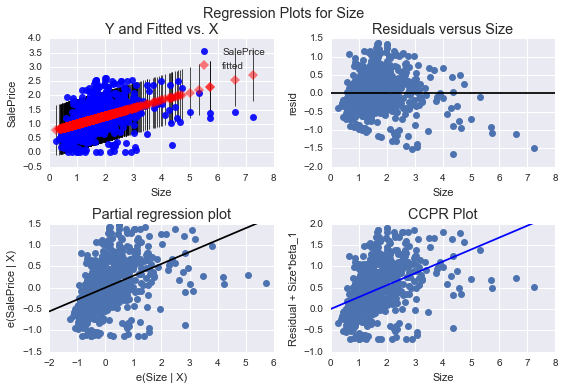

In [48]:
sm.graphics.plot_regress_exog(model, 'Size')

pass

## Part D1 - How to check normality assumption?

### Histogram of residuals

In [50]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()


model.resid

ID
15063471     -0.151334
15063505      1.043660
15064044      0.496674
15064257     -0.099868
15064295     -0.055809
                ...   
2124214951   -0.391707
2126960082   -0.040591
2128308939   -0.362092
2131957929   -0.164985
2136213970   -0.133780
dtype: float64

### q-q plot of residuals against a normal distribution

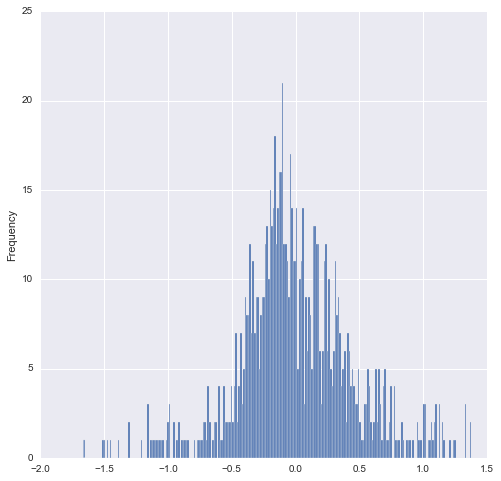

In [51]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8,8))


sm.qqplot(model.resid, line = 's')

pass

pretty close to being a straight lines.

> `line = 's'` shows a standardized line in which the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

## Part D2 - How to check normality assumption?

### q-q plot of two normal distributions

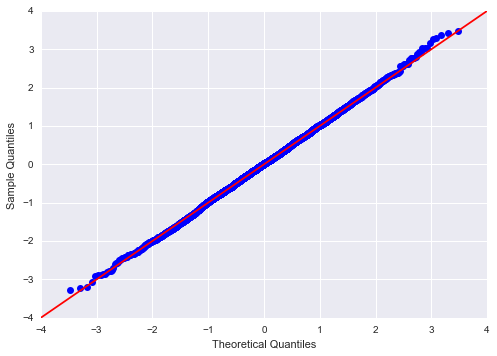

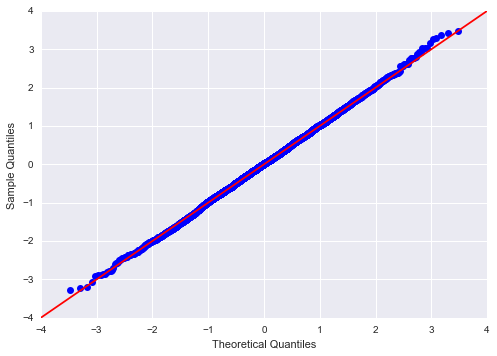

In [57]:
normal_array = np.random.normal(0,1, size =4000)
sm.qqplot(normal_array,line = '45')

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

## Part E - Inference and Fit

In [59]:
# TODO: reload the dataset to get our outliers back...

df = read_dataset()

# TODO: rescale the variables (use the function defined above)

scale_variables(df)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

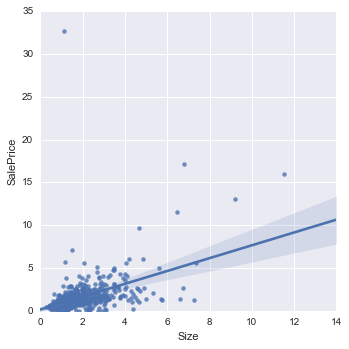

In [62]:
# TODO

sns.lmplot('Size', 'SalePrice', df).set(xlim = (0,None), ylim = (0,None))

### `SalePrice` as a function of `Size` after dropping the outliers

Dropping outliers
- n (before) = 915
- Q1         = 0.78 ($M)
- Q2/Median  = 1.05 ($M)
- Q3         = 1.4 ($M)
- n (after)  = 909


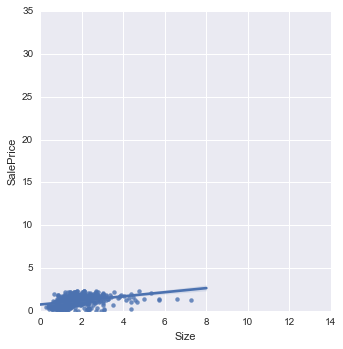

In [65]:
# TODO: drop outliers

drop_outliers(df)

# TODO: plot again using seaborn

sns.lmplot('Size', 'SalePrice', df).set(xlim = (0,14), ylim = (0,35))

## Part F - $R^2$

In [66]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### `SalePrice` as a function of `Size`

In [67]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        20:54:56   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $R^2$

In [68]:
model.rsquared

0.23559317159970783

### Effects of outliers on $R^2$

In [ ]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # drop outliers
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

## Part G - Multiple Linear Regression

In [69]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### `SalePrice` as a function of `Size` and `BedCount`

In [75]:
model = smf.ols(formula= 'SalePrice ~ Size + BedCount', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     506.9
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          8.01e-144
Time:                        21:08:54   Log-Likelihood:                -1026.2
No. Observations:                 819   AIC:                             2058.
Df Residuals:                     816   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1968      0.068      2.883      0.004         0.063     0.331
Size           1.2470      0.045     27.531      0.000         1.158     1.336
BedCount      -0.3022      0.034     -8.839      0.000        -0.369    -0.235
==============================================================================
Omnibus:                      626.095   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.976
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      34.445   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part H - Multicollinearity

### Transforming Variables (cont.)

> #### Activity | Create new variables `SizeLog` and `LotSizeLog` that represent the log of `Size` and `LotSize`.  Repeat using square root, cube root, square, and cube

In [76]:
df[['SizeLog', 'LotSize']] = df[['Size', 'LotSize']].apply(np.log10)

In [77]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear,SizeLog
ID,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0,-0.259637
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,0.386499,1948.0,0.155336
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,0.593286,1976.0,0.309630
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0,0.025306
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0,0.113609
...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0,-0.578396
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0,-0.160522
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,0.361539,1976.0,0.240050


### Multicollinearity

> #### Activity | Show the correlation between the different engineered features of  `Size`

In [80]:
df.info()

# df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeCbrt', 'SizeSquare', 'SizeCube'] ].corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 15063471 to 2136213970
Data columns (total 10 columns):
Address        1000 non-null object
DateOfSale     1000 non-null object
SalePrice      1000 non-null float64
IsAStudio      986 non-null float64
BedCount       836 non-null float64
BathCount      942 non-null float64
Size           967 non-null float64
LotSize        556 non-null float64
BuiltInYear    975 non-null float64
SizeLog        967 non-null float64
dtypes: float64(8), object(2)
memory usage: 85.9+ KB


#### `SalePrice` as a function of `Size` and its other engineered features

In [ ]:
# TODO

> #### Activity | What happened?

## Part I - Adjusted $R^2$

In [ ]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

Let's now add some artificial noise.

In [ ]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(df.shape[0])

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

In [ ]:
formula

In [ ]:
x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [ ]:
print 'Model with artificial noise:'
print '-          R^2 =', x_model.rsquared
print '- Adjusted R^2 =', x_model.rsquared_adj